<font face="Arial" size=4 color=#0000FF > Group 10 - Gender Peace Agreement

<font face="Arial" size=6 color=#333333 >1 Describe

<font face="Arial" size=5 color=#444444 >1.1 General type of the data

<font face="Arial" size=4 color=#666666 >First of all, Let me do some basic setup. And load the data, from the supplied data file.

In [1]:
# installing required packages
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install plotly

In [2]:
pip freeze > requirenment.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Necessary import, for analysing and visulization
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [4]:
# load the dataset from data owner
df=pd.read_excel("pax_wgg_all_agreements_data.xlsx")
df.head()

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,WggRehab,WggEdu,WggHea,WggRepro,WggDevOth,WggImpl,WggImplRole,WggImplSign,WggImplOth,WggOth
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,2,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,1,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,...,1,1,1,0,0,0,0,0,0,0
4,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,1,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,...,0,1,0,0,0,0,0,0,0,0


<font face="Arial" size=4 color=#333333 >From above, we can see this dataset is a tabular.

<font face="Arial" size=5 color=#444444 >1.2 Scale and complexity

In [5]:
# see dataset' size
df.size

29309

In [6]:
# see the number of rows and columns
df.shape

(371, 79)

In [7]:
# get the datatype and Non-Null information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Con            371 non-null    object 
 1   Contp          371 non-null    object 
 2   PP             371 non-null    int64  
 3   PPName         371 non-null    object 
 4   Reg            371 non-null    object 
 5   AgtId          371 non-null    int64  
 6   Ver            371 non-null    int64  
 7   Agt            371 non-null    object 
 8   Dat            371 non-null    object 
 9   Status         371 non-null    object 
 10  Lgt            371 non-null    int64  
 11  N_characters   371 non-null    int64  
 12  Agtp           371 non-null    object 
 13  Stage          371 non-null    object 
 14  StageSub       366 non-null    object 
 15  Part           366 non-null    object 
 16  ThrdPart       220 non-null    object 
 17  OthAgr         220 non-null    object 
 18  Loc1ISO   

<font face="Arial" size=4 color=#333333 >This database is a tabular (size is 29309) with 371 rows x 79 columns. The data type distrubutions are 64 columns in numerics, 6 for float64 and 58 for int64, while 15 columns in objects(string and datetime).


The agreement items are sorted by first letter of country names(Column"Con") <font face="Arial" size=4 color=#0000FF >in alphabetical order.
    
<font face="Arial" size=4 color=#333333 >By understanding the codebook, I found the structure of the database. There is a <font face="Arial" size=4 color=#0000FF >parent-child relation from column"WggPar". <font face="Arial" size=4 color=#333333 >For instance, cloumn "WggPar" has 4 sub-contexts, "WggGenQuot", "WggEffPart"，“WggCitizen” and "WggParOth".  
    

<font face="Arial" size=4 color=#666666 >Before further discussion, I should do cleaning with the database.

<font face="Arial" size=5 color=#F0000F > *Cleaning

<font face="Arial" size=4 color=#666666 > Actually, this database has already cleaned by previous data scientists, here I just go through this step to understand better with my database.

In [8]:
#Descriptive statistics include those that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution.
#Describing all columns of a DataFrame regardless of data type.
df.describe(include="all")

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,WggRehab,WggEdu,WggHea,WggRepro,WggDevOth,WggImpl,WggImplRole,WggImplSign,WggImplOth,WggOth
count,371,371,371.00000,371,371,371.000000,371.000000,371,371,371,...,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
unique,76,4,NaN,86,6,NaN,NaN,370,340,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Colombia,Government,NaN,Colombia V - Santos,Africa (excl MENA),NaN,NaN,Statement of the State Commissions of Abkhazia...,1996-02-16,Multiparty signed/agreed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,182,NaN,19,171,NaN,NaN,2,5,348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,77.90566,NaN,NaN,1070.835580,1.221024,NaN,NaN,NaN,...,0.097035,0.097035,0.099730,0.021563,0.010782,0.156334,0.091644,0.051213,0.032345,0.078167
std,NaN,NaN,45.30383,NaN,NaN,616.658872,0.597011,NaN,NaN,NaN,...,0.296405,0.296405,0.300045,0.145449,0.103413,0.363662,0.288913,0.220729,0.177154,0.268797
min,NaN,NaN,2.00000,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,33.00000,NaN,NaN,560.500000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,87.00000,NaN,NaN,933.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,111.00000,NaN,NaN,1557.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
#Including only string columns in a DataFrame description.
df.describe(include="object")

,Con,Contp,PPName,Reg,Agt,Dat,Status,Agtp,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO
count,371,371,371,371,371,371,371,371,371,366,366,220,220,366,24
unique,76,4,86,6,370,340,4,3,5,16,352,210,219,52,5
top,Colombia,Government,Colombia V - Santos,Africa (excl MENA),Statement of the State Commissions of Abkhazia...,1996-02-16,Multiparty signed/agreed,Intra,SubPar,MultIss,"EZLN, Mexican Government","William Clinton, U.S. President; Warren Christ...",- the relevant Resolution of the Conference on...,SSD,SDN
freq,24,182,19,171,2,5,348,286,139,75,5,4,2,32,10


In [10]:
# show the items with multiple names in "Con"
df[df['Con'].str.contains('/')]

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,WggRehab,WggEdu,WggHea,WggRepro,WggDevOth,WggImpl,WggImplRole,WggImplSign,WggImplOth,WggOth
21,Angola/Burundi/Central African Republic/Democr...,Government,6,African Great Lakes: Regional Process,Africa (excl MENA),668,1,"Pact on Security, Stability, and Development i...",2006-12-15,Multiparty signed/agreed,...,1,0,0,0,0,0,0,0,0,0
22,Angola/Burundi/Central African Republic/Democr...,Government,6,African Great Lakes: Regional Process,Africa (excl MENA),349,1,"Dar-Es-Salaam Declaration on Peace, Security, ...",2004-11-20,Multiparty signed/agreed,...,0,0,1,0,0,1,1,0,1,0
23,Angola/Burundi/Central African Republic/Democr...,Government,6,African Great Lakes: Regional Process,Africa (excl MENA),789,1,"Peace, Security and Cooperation Framework for ...",2013-02-24,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
24,Angola/Cabinda,Government/territory,137,Cabinda process,Africa (excl MENA),1336,1,Memorandum of Peace and Understanding in Cabin...,2006-08-01,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
25,Angola/Central African Republic/Democratic Rep...,Government,6,African Great Lakes: Regional Process,Africa (excl MENA),1062,1,Protocol of Non-aggression and Mutual Defence ...,2006-11-30,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Sudan/Darfur,Government/territory,21,Darfur-Sudan peace process,Africa (excl MENA),350,1,Darfur Peace Agreement,2006-05-05,Multiparty signed/agreed,...,0,1,1,0,1,0,0,0,0,0
342,Sudan/Darfur,Government/territory,21,Darfur-Sudan peace process,Africa (excl MENA),94,1,Declaration of Principles for the Resolution o...,2005-07-05,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
343,Sudan/Darfur,Government/territory,21,Darfur-Sudan peace process,Africa (excl MENA),91,1,"Protocol between the Government of Sudan, SLM/...",2004-11-09,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
344,Sudan/Darfur,Government/territory,21,Darfur-Sudan peace process,Africa (excl MENA),647,1,Humanitarian Ceasefire Agreement on the Confli...,2004-04-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0


<font face="Arial" size=4 color=#333333 >However, After some thoughts, I did not choose to split them into rows with single country name. There are the 2 main reasons:  
Reason a) What I want to see with geographical pattern can also work with column "Reg"(region) and which should be a better way. Because we can see from the df.describe(), there are 76 different countries and Colombia is the most frequently mentioned countries with only 24 times, which is a small scale of data. While, if I analyse the geographical patterns by regions, the data in different regional groups are relatively larger(Africa(excl MENA) has 171 items), which should contribute to a higher <font face="Arial" size=4 color=#0000FF >Conclusion Validity.

In [11]:
# have a close look at Region and Country columns by .describe()
df.describe(include="all")[['Reg','Con']]

,Reg,Con
count,371,371
unique,6,76
top,Africa (excl MENA),Colombia
freq,171,24
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN


<font face="Arial" size=4 color=#333333 > Reason b) The description of the column "Con" in codebook is "The country or jurisdiction in which the conflict originated; where the conflict has a territorial element, the entity to which the conflict relates." Thus, it is a normal thing that there is a unit of country/entity names for one agreement. So there seems less reasonable to split them into different parts in this context.


<font face="Arial" size=4 color=#333333 >*2.In the column "Reg", I found there are 6 different values here. However, the "Cross-regional" seems weird to me, not like "Americas" and other regions, "Cross-regional" is not a geographical region. Absolutely, it is not a region name and in different rows have different meanings. Values in the same column should be in the same attribute. Hence, I decided to make it clear which regions were involved in these rows, which might help with later visualization.
------------------------------------------------------------------------------------------------------------

In [12]:
#to see which regions are mentioned in this database.
df['Reg'].unique()

array(['Europe and Eurasia', 'Middle East and North Africa',
       'Africa (excl MENA)', 'Asia and Pacific', 'Americas',
       'Cross-regional'], dtype=object)

In [13]:
#select all "Cross-regional" rows
df[df['Reg']== 'Cross-regional']

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,WggRehab,WggEdu,WggHea,WggRepro,WggDevOth,WggImpl,WggImplRole,WggImplSign,WggImplOth,WggOth
135,Indonesia/Portugal/(East Timor),Government/territory,57,East Timor-Indonesia peace process,Cross-regional,241,1,Agreement Between the Republic of Indonesia an...,1999-05-05,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
217,Pakistan/Taliban,Government/territory,86,Pakistan-Taliban process,Cross-regional,735,1,Swat Peace Accord,2009-02-16,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
218,Pakistan/Taliban,Government/territory,86,Pakistan-Taliban process,Cross-regional,734,1,North West Frontier Province Government’s Agre...,2008-05-21,Multiparty signed/agreed,...,0,1,1,0,0,0,0,0,0,0
219,Pakistan/Taliban,Inter-group,86,Pakistan-Taliban process,Cross-regional,1530,1,Peace Agreement in North Waziristan (Miranshah...,2006-09-05,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0


<font face="Arial" size=4 color=#333333 > From wikipedia, I found the full list of countries by regions in the world(https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification):

In [14]:
# load the dataset from file
reg_con=pd.read_excel("region countries list.xlsx")
reg_con

,Country,Region,Global South
0,Andorra,Europe,Global North
1,United Arab Emirates,Middle east,Global South
2,Afghanistan,Asia & Pacific,Global South
3,Antigua and Barbuda,South/Latin America,Global South
4,Anguilla,South/Latin America,Global South
...,...,...,...
243,Guernsey,Europe,Global North
244,Isle of Man,Europe,Global North
245,Jersey,Europe,Global North
246,Saint Barthelemy,South/Latin America,Global South


<font face="Arial" size=4 color=#333333 >I tried to find these countries' region in dataframe above.

In [15]:
#using df[df[].isin([])] find the countries' region
Portugal=reg_con[reg_con['Country'].isin(['Portugal'])]['Region']
print('Region of Portugal is',Portugal)

Indonesia=reg_con[reg_con['Country'].isin(['Indonesia'])]['Region']
print('Region of Indonesia is',Indonesia)

East_timor=reg_con[reg_con['Country'].isin(['East Timor'])]['Region']
print('Region of East Timor is',East_timor)

Pakistan=reg_con[reg_con['Country'].isin(['Pakistan'])]['Region']
print('Region of Pakistan is',Pakistan)

Taliban=reg_con[reg_con['Country'].isin(['Taliban'])]['Region']
print('Region of Taliban is',Taliban)

Region of Portugal is 176    Europe
Name: Region, dtype: object
Region of Indonesia is 97    Asia & Pacific
Name: Region, dtype: object
Region of East Timor is Series([], Name: Region, dtype: object)
Region of Pakistan is 170    Asia & Pacific
Name: Region, dtype: object
Region of Taliban is Series([], Name: Region, dtype: object)


<font face="Arial" size=3 color=#333333 > Taliban and East Timor are not shown on the list.

From https://en.wikipedia.org/wiki/Taliban, we can see "The Taliban (Pashto: طالبان‎, romanized: ṭālibān, lit. 'students') or Taleban, who refer to themselves as the Islamic Emirate of Afghanistan (IEA)". And Afghanistan belongs to "Asia & Pacific".

<font face="Arial" size=3 color=#333333 >From https://en.wikipedia.org/wiki/East_Timor, we can see "East Timor (/-ˈtiːmɔːr/ (About this soundlisten)) or Timor-Leste (/tiˈmɔːr ˈlɛʃteɪ/; Tetum: Timór Lorosa'e), officially the Democratic Republic of Timor-Leste[11] (Portuguese: República Democrática de Timor-Leste,[12] Tetum: Repúblika Demokrátika Timór-Leste),[13] is an island country in Southeast Asia.[14]". So I think it is "Asia & Pacific".
    
To sum up, the 4 "cross-regional" rows should become: "Asia & Pacific" and "Europe"; "Asia & Pacific". The reason why Pakistan/Taliban shows as "cross-regional" but only defined as "Asia & Pacific" by Wikipedia because according to the codebook, the column "Con" is not only about the countries also has some entities like Taliban, which has a complex cultural and political history, campaigned in several countries.

<font face="Arial" size=4 color=#333333 > Since there are only 4 rows and I manually found their regions, I will manually replace the "Cross-regional" with "Asia & Pacific" in the database. For the "Indonesia/Portugal/(East Timor)" case, there is another region, "Europe and Eurasia", which should also be added. The idea to do this could be to add a derived column named "Reg1" and store the information there.
However, since it is only one single row that needs this change, it is not a great idea to add a new column only to hold one applicable data. I will mention this as special comment in later visualization.

In [16]:
#Change the "Cross-regional" into "Asia & Pacific" 
#for both "Pakistan/Taliban" and "Indonesia/Portugal/(East Timor)"
df.replace('Cross-regional', 'Asia and Pacific',inplace=True)
#check it works
df[(df['Con']=='Pakistan/Taliban')|(df['Con']=='Indonesia/Portugal/(East Timor)')][['Con','Reg']]

,Con,Reg
135,Indonesia/Portugal/(East Timor),Asia and Pacific
217,Pakistan/Taliban,Asia and Pacific
218,Pakistan/Taliban,Asia and Pacific
219,Pakistan/Taliban,Asia and Pacific


<font face="Arial" size=3 color=#333333 > From the caveats in the documentation, I found it might be python's bug to warn. Because what I am doing is exactly change the 4 row's region("Reg"), which might chained with "Con".

<font face="Arial" size=4 color=#333333 >*3.In column"UcdpAgr", "PamAgr", "CowWar", there are some blank and some "NA" in excel, however, they are all shown as "NAN" in computer language. I cannot say blank and "NA" are the same since it might be an input error or manual issues like forgetting to input. But these columns are not related tightly to my analysis goal so I won't make changes to this.
I did a screenshot from the excel.    
example1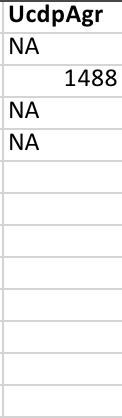

In [17]:
#take column 'UcdpAgr' for example1
df['UcdpAgr'].head(10)

0       NaN
1    1488.0
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: UcdpAgr, dtype: float64

<font face="Arial" size=4 color=#333333 >*4.In column 'Dat', I should double-check and make sure they are all in DateTime form but not str, so I could use this column easier to do statistics.

In [18]:
#to make sure all 'Dat' is in datetime.
df['Dat'] = pd.to_datetime(df['Dat'])

<font face="Arial" size=5 color=#F0000F > *Assertions

In [19]:
# there is no empty in Categorical data, and they are 0/1
categorical = df.loc[:, 'WggPar':'WggOth':]
file_columns = categorical.columns.tolist()
for column in file_columns:
    assert set(df[column])=={0,1}, "Detected values other than binary numbers."

# check all the regions
assert set(df['Reg'])=={'Europe and Eurasia', 'Middle East and North Africa',\
       'Africa (excl MENA)', 'Asia and Pacific', 'Americas'}, "Detected values other than regions."

<font face="Arial" size=5 color=#444444 >1.3 Fields and data types are present

<font face="Arial" size=4 color=#333333 >Generally, this data is<font face="Arial" size=4 color=#0000FF > Women and Peace
Agreements Database (PA-X Women).
    
<font face="Arial" size=4 color=#333333 >From resource provided by data holder(https://www.politicalsettlements.org/research/pax-women/), I found the precise description about this database: <font face="Arial" size=4 color=#0000FF >"The database lists all the peace agreements between 1990 and the present day which have provisions on women, gender or sexual violence, and provides full search features for what those provisions deal with."
    -----------------------------------------------------------------------------------------------------------

<font face="Arial" size=4 color=#333333 > As for the categorical values:  
From column'Wggpar' on, which are 11 aspects to describe whether and how women are involved in the specific agreement, there are 2 levels, 0 and 1 ("1" represents "True" for involves/appears and "0" denotes "False" for the opposite). 

In [20]:
#to see the max/min in date signed the agreement
df_dat=df['Dat']
print(df_dat.max())
print(df_dat.min())

2020-03-06 00:00:00
1990-03-23 00:00:00


In [21]:
#using .describe() to see the datetime statistics information
df.describe(include="all")['Dat']

count                     371
unique                    340
top       1996-02-16 00:00:00
freq                        5
first     1990-03-23 00:00:00
last      2020-03-06 00:00:00
mean                      NaN
std                       NaN
min                       NaN
25%                       NaN
50%                       NaN
75%                       NaN
max                       NaN
Name: Dat, dtype: object

<font face="Arial" size=4 color=#333333 > From the above, we can see the latest agreement in the database was signed on March 6th, 2020, while the earliest one was signed on March 23rd, 1990. On Feb 16th, 1996, signed the most, 5, agreements in a single day.

<font face="Arial" size=5 color=#444444 >1.4 Links between this data and other data

<font face="Arial" size=4 color=#333333 >In this database, at first, I guess the unique id should be the column "Agt", in codebook which denotes "Agreement Name". There are no foreign keys in our context.

In [22]:
#to confirm there is no duplication in this column
df.Agt.duplicated().unique()

array([False,  True])

<font face="Arial" size=4 color=#333333 >However, there is "True", which means "Agt" is not the unique id, row 121 has the same value with another in column "Agt", shown as above.

In [23]:
# using df.duplicated() to find the column duplicated
df[df.duplicated('Agt')]

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,WggRehab,WggEdu,WggHea,WggRepro,WggDevOth,WggImpl,WggImplRole,WggImplSign,WggImplOth,WggOth
121,Georgia/Russia/Abkhazia,Government/territory,43,Abkhazia peace process,Europe and Eurasia,1803,1,Statement of the State Commissions of Abkhazia...,2000-01-19,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0


<font face="Arial" size=4 color=#333333 >Then I considered column "AgtId" as unique id. And I confirmed it.

In [24]:
#to confirm there is no duplication in this column
df.AgtId.duplicated().unique()

array([False])

<font face="Arial" size=4 color=#333333 >
From(https://www.politicalsettlements.org/research/pax-women/): 
<font face="Arial" size=4 color=#666666 >"The Women and Peace Agreement Database (PA-X Women) is a sub-database of all the agreements which include an explicit reference to women and gender, with searchable sub-categories."    

<font face="Arial" size=4 color=#333333 >    
This database(pax_wgg_all_agreements_data.xlsx) is the sub-database of the other one(pax_all_agreements_data.xlsx), which we got from data owner. They are in same structure and share the same column A to Z. 

We can say that "pax_wgg_all_agreements_data.xlsx" is focusing on gender topics in the huge peace agreement context(pax_all_agreements_data.xlsx).
    -----------------------------------------------------------------------

<font face="Arial" size=5 color=#444444 >1.5 Summary statistics

<font face="Arial" size=4 color=#333333 >
From the resource shared by data owner https://www.politicalsettlements.org/research/pax-women/: 

<font face="Arial" size=4 color=#666666 >This database comprises part of PA-X,  a peace agreement database which is intended to operate as a Peace Agreement Access Tool.  This database will give access to a definitive collection of peace agreements from 1990 to the present day, which at present comprises around 1200 peace agreements in around 100 jurisdictions.

Its purpose is to enable research on peace agreement provisions, and to support those engaging in peace processes to access comparative information on how peace agreements deal with core issues of inclusion, human rights, and development.
    
<font face="Arial" size=4 color=#0000FF >To sum up, this database contains information about peace agreements focusing on 11 females aspects in 6 regions' 76 countries/entities in the world from 1990.03.23 to 2020.03.06.
    ----------------------------------------------------------------------------

<font face="Arial" size=5 color=#444444 >1.6 Questions discussed with data holder

<font face="Arial" size=4 color=#333333 > Our data owner wants to see some new patterns( previous works:https://www.peaceagreements.org/visualizing-peace). We should focus on the field of female and have not given detailed tasks or questions.
 
I, personally, am quite curious about <font face="Arial" size=4 color=#0000FF >From 1990 to 2020, how the degree of female's rights and interests mentioned in peace agreements changes, and other interesting patterns considering the timeline.

<font face="Arial" size=4 color=#333333 > In the context of the world, patterns shown here may imply if female's rights arise to some extend. And if I combine it with geographical value, agreement lengths, etc., more interesting claims might show up, and will demonstrate the similarities and differences among female groups.

<font face="Arial" size=6 color=#333333 >2 Explore

<font face="Arial" size=5 color=#444444 >2.1 Exploratory visualizations

<font face="Arial" size=4 color=#0000FF >Exercise 1: <font face="Arial" size=4 color=#333333 >I want to see the distribution of peace agreements through the timeline.
    -------------------------------------------------------------------

<font face="Arial" size=4 color=#333333 > At first, I tried to see the distribution by date.
however, the data is too scattered and hard to see pattern or trend also the x-axis is not accurate.

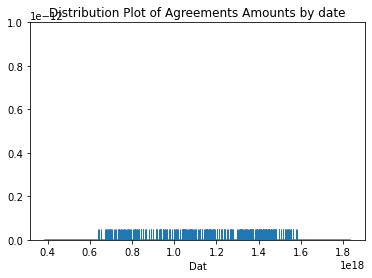

In [25]:
#use distplot to visualize the distribution by date
chart = sns.distplot(df['Dat'],rug=True)
chart.set_title('Distribution Plot of Agreements Amounts by date')
plt.show()

<font face="Arial" size=4 color=#333333 > Now, I got a new idea to collect the datetime by year, and to see the overall distribution and trend.

In [26]:
#add a new coloumn to store the 'Year' information
df['Year'] = df['Dat'].dt.year

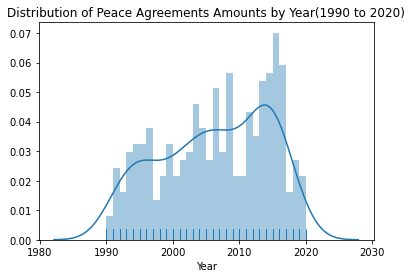

In [27]:
#use distplot to see the distribution by Year
chart = sns.distplot(df['Year'],rug=True,bins=30)
chart.set_title('Distribution of Peace Agreements Amounts by Year(1990 to 2020)')
plt.show()

In [28]:
#using .describe() to get quantitative information
df['Year'].describe()

count     371.000000
mean     2006.191375
std         8.086928
min      1990.000000
25%      2000.000000
50%      2007.000000
75%      2013.500000
max      2020.000000
Name: Year, dtype: float64

<font face="Arial" size=5 color=#F3333F >Analysis 

In [29]:
#analyse mode/mean/median
year_mode=int(df['Year'].mode())
year_mean= df['Year'].mean()
year_median=int(df['Year'].median())

print("In year {} signed the biggest amounts of peace agreements while from 1990\
 to 2020, half of the peace agreements are signed/agreed before {}.".format(year_mode,year_median))

In year 2015 signed the biggest amounts of peace agreements while from 1990 to 2020, half of the peace agreements are signed/agreed before 2007.


In [30]:
#analyse the skew and kurtosis
year_skew=df['Year'].skew()
year_kurtosis=df['Year'].kurtosis()
print('skew is {} and kurtosis is {}.'.format(year_skew,year_kurtosis))

skew is -0.28670056939384836 and kurtosis is -1.0899029295893257.


<font face="Arial" size=4 color=#F3333F >Descriptive statistics:<font face="Arial" size=4 color=#333333 >It shows a Unimodal Distribution with the 371 peace agreement signed in 30 years, the mode is 2015, the median is 2007, mean at 2006.19(meaningless here), std is 8.09. Put the results back to the data context, that is to say: From 1990 to 2020, in the year 2015 signed the biggest amounts of peace agreements while half of the peace agreements are signed before 2007. This plot also shows a negative skew(-0.29), which shows the data are fairly symmetrical. And the kurtosis is negative, basically, the outlier character of the distribution is less extreme than that of a normal distribution. 

    
    
<font face="Arial" size=4 color=#F3333F >Trend and outliers: <font face="Arial" size=4 color=#333333 > In this context, the x-axis is not quantitative numbers(just years), so the outliers here will not be regarded as data error, only special cases instead. The trend is from 1990 to 2015, the number of the peace agreement signed per year experienced a rise with some fluctuations. After 2015, the peace agreement signing frequency dropped down. It might imply that some fewer conflicts or issues happen in the latest 5 years, so there are fewer peace agreements that are signed or agreed upon.

<font face="Arial" size=4 color=#333333 > To see the mode part closely could help me understand what was happening back then.<font face="Arial" size=4 color=#0000FF >To check whether it was a world scale peak of peace issues or just in some countries and regions.

In [31]:
#pick up the years around peak year(2015) to have a close look
datetime_is_numeric=True
df[(df['Year']>2013) & (df['Year']<2017)].describe(include='all')

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,WggEdu,WggHea,WggRepro,WggDevOth,WggImpl,WggImplRole,WggImplSign,WggImplOth,WggOth,Year
count,69,69,69.000000,69,69,69.000000,69.000000,69,69,69,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
unique,22,3,NaN,25,5,NaN,NaN,69,60,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Colombia,Government,NaN,Colombia V - Santos,Africa (excl MENA),NaN,NaN,Agreement on the Cessation of Hostilities betw...,2015-10-15 00:00:00,Multiparty signed/agreed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,41,NaN,18,23,NaN,NaN,1,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-23 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,94.753623,NaN,NaN,1519.144928,1.391304,NaN,NaN,NaN,...,0.115942,0.101449,0.028986,0.028986,0.231884,0.173913,0.086957,0.028986,0.115942,2015.014493
std,NaN,NaN,34.962335,NaN,NaN,352.098719,0.574389,NaN,NaN,NaN,...,0.322501,0.304135,0.168995,0.168995,0.425127,0.381812,0.283836,0.168995,0.322501,0.795072
min,NaN,NaN,2.000000,NaN,NaN,798.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,NaN,NaN,80.000000,NaN,NaN,1370.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000


<font face="Arial" size=4 color=#333333 > We can see that among the 22 countries signed peace agreements from 2013 to 2017, 18 are signed by Colombia, which means there might be some severe conflicts and peace issues in that single country.
Next, I select the agreements signed in Colombia and try to see the trend of agreements.

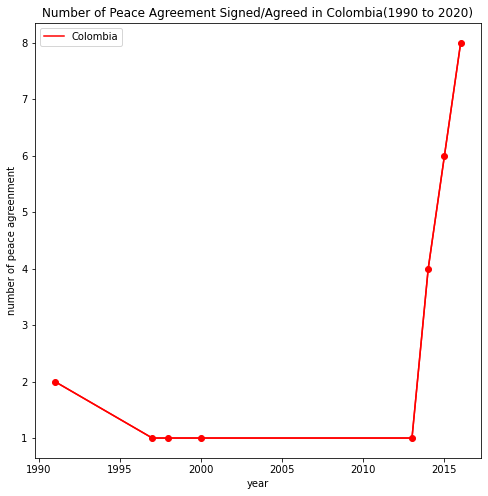

In [32]:
#using line chart to see the trend of peace agreements amounts by timeline
plt.figure(figsize = (8, 8))
x1=(df[df['Con']=='Colombia'].groupby('Year').count())._stat_axis.values.tolist()
y1=(df[df['Con']=='Colombia'].groupby('Year').count())['Con']
l1=plt.plot(x1,y1,'r-',label='Colombia')
plt.plot(x1,y1,'ro-')
plt.title('Number of Peace Agreement Signed/Agreed in Colombia(1990 to 2020)')
plt.xlabel('year')
plt.ylabel('number of peace agreenment')
plt.legend()
plt.show()

<font face="Arial" size=4 color=#333333 > Interestingly, In Colombia, from 1990 to 2012, only 1 or 2 agreements were signed in corresponding years. However, there is a huge number(4,6,8) of peace agreements are signed in 2013,2014, and 2015. After 2015, up till now, there are no peace agreements signed so far. From 2015 Colombia Report 30 March.pdf(https://sais.jhu.edu/sites/default/files/2015%20Colombia%20Report%2030%20March.pdf), 
    "After many decades of failed negotiations between the Government of Colombia and the
main rebel group, the Fuerzas Armadas Revolutionarias de Colombia (FARC),
negotiations currently underway in Havana, Cuba, have completed three of six planks of
a peace agreement and appear likely to finish negotiations on a comprehensive peace
agreement in the foreseeable future in spite of numerous potential obstacles. "
    Which means after 2015 the political situation in Colombia eases.

<font face="Arial" size=4 color=#F3333F >Thinking: <font face="Arial" size=4 color=#333333 >We can see because the database is not huge(371 rows), patterns in single countries(like the case in Colombia) might influence the whole world's pattern.

<font face="Arial" size=4 color=#F3333F >Hypothesis#1:<font face="Arial" size=4 color=#333333 > Before 1990, the number of peace agreements signed or agreed experienced a rise in the world. (In the third part of this notebook I will talk about Hyposesis in detail).

<font face="Arial" size=4 color=#0000FF >Exercise 2: <font face="Arial" size=4 color=#333333 >I want to know, from 1990 to 2020, how female' involvement in peace agreements changes?
-----------------------------------------------------
<font face="Arial" size=4 color=#333333 >Here, the involvement is tightly related to the column from "WggPar". To be more specific, if there are more "1", according to the codebook, denoting there is more consideration about the female in that agreement. 

However, it might be unfair to make this comparison in some situations. For instance, if a peace agreement is on a large scale(here, the "scale" can be denoted by the number of characters of the peace agreement, which is shown in column "N_characters") while the other one is on a tiny scale, but they have the same number of "1" in female's context, it is absolutely unfair to say these 2 peace agreement have the same degree of female consideration.
    

<font face="Arial" size=4 color=#0000FF >Thus, I got an idea of introduce a new function here to see the proportion.(e.g. if the number of "1" is 3 and the number of characters is 100, the column would contain 0.03). Considering the proportion might be very tiny numbers all below 1, I will expand 10000 times(I have tried 1000 times and 100000 times as well), to make the numerics looks fine.

<font face="Arial" size=4 color=#333333 >Step 1: sum up the "1" in every peace agreement item. We call it wgg_sum, and add at last column.

In [33]:
#to sum up all 1 in every peace agreement items.
wgg_sum=df.loc[:, 'WggPar':'WggOth':]
df['Wgg_sum'] = wgg_sum.sum(axis=1)
#observe the dataset by .head() to check it works
df[['Con','Wgg_sum']].head()

,Con,Wgg_sum
0,Afghanistan,2
1,Afghanistan,2
2,Afghanistan,2
3,Afghanistan,23
4,Afghanistan,9


<font face="Arial" size=4 color=#333333 >Step 2: get the proportion and add as Wgg_invlove, again, at last column.

In [34]:
#calculate the proportion as Wgg_involve and store in a column
df.eval('Wgg_involve =10000*(Wgg_sum/N_characters) ', inplace=True)
#observe the dataset by .head() to check it works
df[['Con','Wgg_involve']].head()

,Con,Wgg_involve
0,Afghanistan,3.820439
1,Afghanistan,1.960208
2,Afghanistan,1.800180
3,Afghanistan,5.786746
4,Afghanistan,3.733510


<font face="Arial" size=4 color=#333333 > Step 3: visualization attemption1. I choose to use line chart first, because the x-axis will be timeline which is a continious data. And the y-axis is the Wgg_involve I get from Step2.

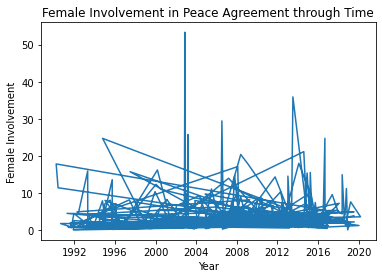

In [35]:
# attemption 1: draw a line chart
Dat=df['Dat']
Wgg_involve=df['Wgg_involve']
plt.plot(Dat,Wgg_involve)
plt.title('Female Involvement in Peace Agreement through Time')
plt.xlabel('Year')
plt.ylabel('Female Involvement')
plt.show()

<font face="Arial" size=4 color=#333333 > Step 4: visualization attemption2. Looking at the messy chart above, I realized I ingnored the fact that: there might be several values to one single date, which makes it hard to use a line chart to present. So I changed to use scatterplot and lmplot instead.

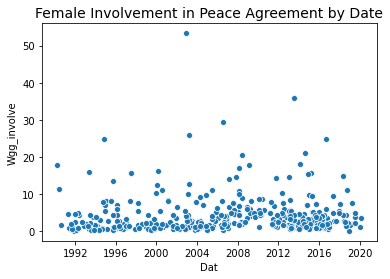

In [36]:
# attemption 2: draw a scatterplot
sns.scatterplot(x='Dat', y='Wgg_involve',data=df)
plt.title('Female Involvement in Peace Agreement by Date',fontsize=14)
plt.show()

<font face="Arial" size=4 color=#333333 > Step 5: visualization attemption2. Looking at the messy chart above, I realized I ingnored the fact that: there might be several values to one single date, which makes it hard to use a line chart to present. So I changed to use scatterplot and lmplot instead.

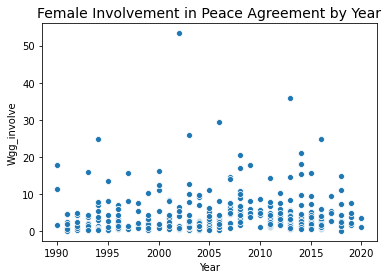

In [37]:
# attemption 3: draw a scatterplot
sns.scatterplot(x='Year', y='Wgg_involve',data=df)
plt.title('Female Involvement in Peace Agreement by Year',fontsize=14)
plt.show()

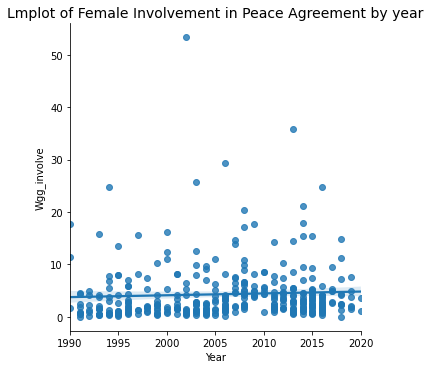

In [38]:
# try to find a trend by lmplot
involvement_female=sns.lmplot(x='Year', y='Wgg_involve',data=df)
plt.title('Lmplot of Female Involvement in Peace Agreement by year',fontsize=14)
plt.show()

<font face="Arial" size=4 color=#333333 > I want to see whether there will be a beyond linear correlation between year and females' invlovement in peace agreements.

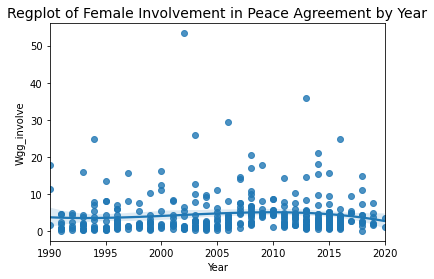

In [39]:
# try to find a trend by Regplot
involvement_female1=sns.regplot(x='Year', y='Wgg_involve',data=df,order=3)
plt.title('Regplot of Female Involvement in Peace Agreement by Year',fontsize=14)
plt.show()

<font face="Arial" size=5 color=#F3333F >Analysis 

<font face="Arial" size=4 color=#333333 > From the plots above, there is a weak correlation between year and females' involvement in peace agreements. And most of the agreements have a similar level of female involvement, some cases are outliers and the involvement level is extremely high in this model. I will double-check whether should I trust it.

In [40]:
#get the basic descriptive statistics about the Wgg_involve
df['Wgg_involve'].describe()

count    371.000000
mean       4.334692
std        5.349657
min        0.000000
25%        1.382499
50%        2.597403
75%        5.023549
max       53.333333
Name: Wgg_involve, dtype: float64

In [41]:
#get the basic descriptive statistics about the N_characters
df['N_characters'].describe()

count       371.000000
mean      36050.334232
std       77963.877920
min         750.000000
25%        6511.000000
50%       14376.000000
75%       29920.500000
max      908459.000000
Name: N_characters, dtype: float64

In [42]:
#pick the outlier as special case
df[df['Wgg_involve']==df['Wgg_involve'].max()][['Con','Agt','N_characters','Wgg_sum','Wgg_involve']]

,Con,Agt,N_characters,Wgg_sum,Wgg_involve
329,Sri Lanka,Declaration in Support of the Peace Process in...,750,4,53.333333


<font face="Arial" size=4 color=#333333 > Clearly, This agreement is exactly the special case, because characters in that is the min in whole dataset(from analysis above). And I found this agreement's link,https://www.peaceagreements.org/wview/1155/Declaration%20in%20Support%20of%20the%20Peace%20Process%20in%20Sri%20Lanka%20(Oslo%20Declaration), and it was in Pre-negotiation/process stage, which might results in a small scale of agreements.

<font face="Arial" size=4 color=#F3333F >Thinking: <font face="Arial" size=4 color=#333333 > The extreme cases can be outliers in this model, showing the pitfall in this model. However, I can use the other way to present females involvement levels, calculating the amounts of "1" in every peace agreement. I will conduct this method in the following exercise.

<font face="Arial" size=4 color=#0000FF >Exercise 3: <font face="Arial" size=4 color=#333333 >I want to see the pattern of female's involvement in peace agreements in different regions through the timeline.
-----------------------------------------------------

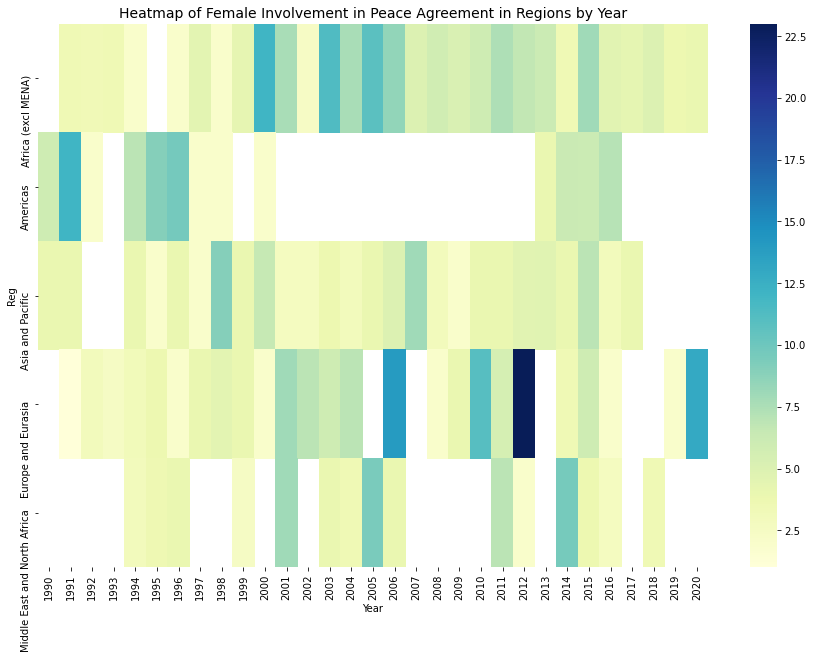

In [43]:
#Heatmap of Female Involvement in Peace Agreement in regions by Year
df1 = df[['Reg','Year','Wgg_sum']]
heatmap1_data = pd.pivot_table(df1, values='Wgg_sum', index=['Reg'], columns='Year')
plt.figure(figsize=(15, 10))
plt.title('Heatmap of Female Involvement in Peace Agreement in Regions by Year',fontsize=14)
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.show()

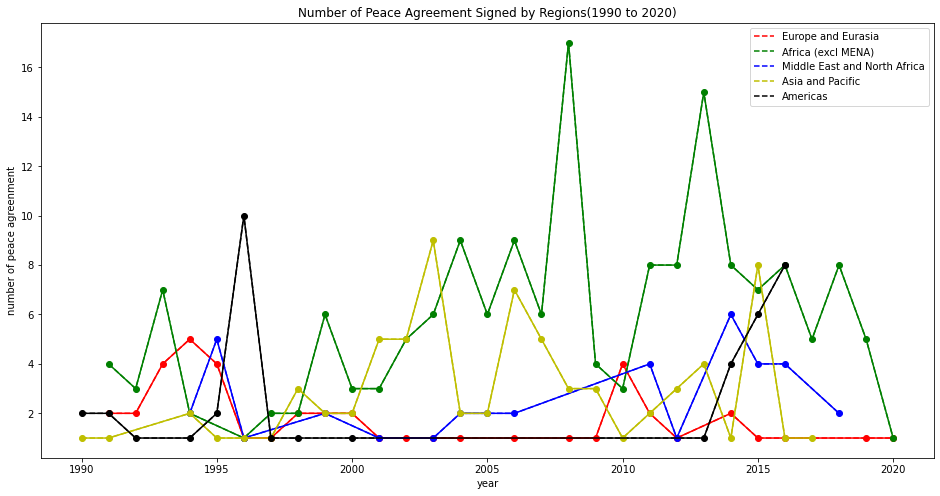

In [44]:
#multiline plot to show the relations and trend
plt.figure(figsize = (16, 8))

x1=(df[df['Reg']=='Europe and Eurasia'].groupby('Year').count())._stat_axis.values.tolist()
y1=(df[df['Reg']=='Europe and Eurasia'].groupby('Year').count())['Con']
x2=(df[df['Reg']=='Africa (excl MENA)'].groupby('Year').count())._stat_axis.values.tolist()
y2=(df[df['Reg']=='Africa (excl MENA)'].groupby('Year').count())['Con']
x3=(df[df['Reg']=='Middle East and North Africa'].groupby('Year').count())._stat_axis.values.tolist()
y3=(df[df['Reg']=='Middle East and North Africa'].groupby('Year').count())['Con']
x4=(df[df['Reg']=='Asia and Pacific'].groupby('Year').count())._stat_axis.values.tolist()
y4=(df[df['Reg']=='Asia and Pacific'].groupby('Year').count())['Con']
x5=(df[df['Reg']=='Americas'].groupby('Year').count())._stat_axis.values.tolist()
y5=(df[df['Reg']=='Americas'].groupby('Year').count())['Con']

l1=plt.plot(x1,y1,'r--',label='Europe and Eurasia')
l2=plt.plot(x2,y2,'g--',label='Africa (excl MENA)')
l3=plt.plot(x3,y3,'b--',label='Middle East and North Africa')
l4=plt.plot(x4,y4,'y--',label='Asia and Pacific')
l5=plt.plot(x5,y5,'k--',label='Americas')

plt.plot(x1,y1,'ro-')
plt.plot(x2,y2,'go-')
plt.plot(x3,y3,'bo-')
plt.plot(x4,y4,'yo-')
plt.plot(x5,y5,'ko-')

plt.title('Number of Peace Agreement Signed by Regions(1990 to 2020)')
plt.xlabel('year')
plt.ylabel('number of peace agreenment')
plt.legend()
plt.show()

<font face="Arial" size=5 color=#F3333F >Analysis 

<font face="Arial" size=4 color=#333333 > Combine the heatmap and line plot, I found that female's involvement in different regions varies. In other words, there is a strong relationship between region and females' involvement, different regions show different patterns through the timeline.

In Africa(excl MENA), were signed the most peace agreements among 5 regions in the dataset, the level of female involvement is the highest between 1999 and 2006. This might imply, during that period, due to the frequent peace conflicts, the government and society took females right seriously.

In 2012, there is the highest level of female involvement shows in the heatmap. Looking through the line chart, I found it was contributed by 2 peace agreements, which means one of or both peace agreements mentioned females' right to a high extend. 

<font face="Arial" size=4 color=#F3333F >Hypothesis#2:<font face="Arial" size=4 color=#333333 > From 1997 to 2009, there is no peace agreement signed in Americas, maybe there is no peace conflicts or war during this period.

In [45]:
#to find the highest level of female involvement
df[df['Wgg_sum']==df['Wgg_sum'].max()][['Con','Agt','N_characters','Wgg_sum','Wgg_involve']]

,Con,Agt,N_characters,Wgg_sum,Wgg_involve
367,Yemen,National Dialogue Conference Outcomes Document,652959,41,0.627911


<font face="Arial" size=4 color=#333333 > From the above, I found a peace agreement with the highest level of female involvement. Here is the peace agreement's link:  (file:///Users/xuzhengpin/Downloads/YE_140124_NDC_National%20Conference%20Outcomes%20Document_EN.pdf), where mention "female" 27 times and "women" 114 times.
This data confirmed my claim, this single peace agreement in Yemen highly mentioned females' rights which influenced the pattern in Europe and Eurasia.


<font face="Arial" size=4 color=#0000FF >Exercise 4: <font face="Arial" size=4 color=#333333 >Based on the last exercise, I want to see the relation between the 11 aspects of females' rights in the peace agreement (through the timeline).
-----------------------------------------------------

In [46]:
#sort out the categorical data by time order
wgg_time=df[['Dat','WggPar','WggEq','WggGrp','WggIntLaw','WggNewInst','WggVio','WggTraJus','WggInstRef',\
            'WggDev','WggImpl','WggOth']]
wgg_timeline= wgg_time.sort_values(by = 'Dat')
wgg_timeline

,Dat,WggPar,WggEq,WggGrp,WggIntLaw,WggNewInst,WggVio,WggTraJus,WggInstRef,WggDev,WggImpl,WggOth
209,1990-03-23,0,0,0,0,0,0,1,0,1,1,0
208,1990-05-30,0,1,0,0,0,0,1,1,0,0,0
55,1990-08-28,0,1,0,1,0,0,0,0,0,0,0
169,1991-04-18,1,0,0,0,0,0,0,0,0,1,0
99,1991-05-27,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2019-07-08,0,1,0,0,0,0,0,0,0,0,0
332,2019-07-17,1,1,0,0,0,0,0,0,0,0,0
176,2019-07-25,0,0,0,0,0,0,0,0,0,1,0
140,2020-01-10,0,0,0,0,1,1,1,1,1,0,0


<font face="Arial" size=4 color=#333333 >The 0/1 are two levels represents "No/Yes": every grid stores the information whether this agreement mentioned one specific aspect(as the column name) relating to females' rights. I will color the "1" green, highlight this part to see the pattern initially.

In [47]:
#visualize the "mention" by color green
wgg_timeline.style.applymap(lambda v
                             : 'background-color: %s' %'#00FF00' if v==1 
                             else'background-color: %s'% '#999999')

<font face="Arial" size=4 color=#333333 >from the above, though I can not see the exact correlation between these 11 aspects about females' right, I will conduct further approach to see the pattern.

In [48]:
#correlation pattern from 1990 to 2020
def _round2(number):
    return np.round(number,2)
#keep all result rounded in 2 deposits
wgg=df[['WggPar','WggEq','WggGrp','WggIntLaw','WggNewInst','WggVio','WggTraJus','WggInstRef',\
            'WggDev','WggImpl','WggOth']]
wgg_corr=_round2(wgg.corr())
wgg_corr.style.background_gradient(cmap='gray_r')

,WggPar,WggEq,WggGrp,WggIntLaw,WggNewInst,WggVio,WggTraJus,WggInstRef,WggDev,WggImpl,WggOth
WggPar,1.000000,0.190000,0.010000,0.050000,0.150000,0.030000,0.020000,0.100000,0.170000,0.070000,-0.060000
WggEq,0.190000,1.000000,0.210000,0.350000,0.150000,0.100000,-0.000000,0.190000,0.340000,-0.070000,-0.080000
WggGrp,0.010000,0.210000,1.000000,0.220000,0.160000,0.120000,0.110000,0.080000,0.310000,0.140000,-0.010000
WggIntLaw,0.050000,0.350000,0.220000,1.000000,0.170000,0.280000,0.100000,0.320000,0.210000,0.030000,-0.030000
WggNewInst,0.150000,0.150000,0.160000,0.170000,1.000000,0.040000,0.100000,0.200000,0.260000,0.120000,-0.040000
WggVio,0.030000,0.100000,0.120000,0.280000,0.040000,1.000000,0.170000,0.070000,0.210000,0.060000,-0.040000
WggTraJus,0.020000,-0.000000,0.110000,0.100000,0.100000,0.170000,1.000000,0.150000,0.160000,0.090000,-0.010000
WggInstRef,0.100000,0.190000,0.080000,0.320000,0.200000,0.070000,0.150000,1.000000,0.150000,0.040000,-0.030000
WggDev,0.170000,0.340000,0.310000,0.210000,0.260000,0.210000,0.160000,0.150000,1.000000,0.060000,-0.020000
WggImpl,0.070000,-0.070000,0.140000,0.030000,0.120000,0.060000,0.090000,0.040000,0.060000,1.000000,-0.010000


Correlation of categorical data(1990-2020)

In [49]:
#correlation pattern in 1990s
df_90s=df[(df['Year']>1989)& (df['Year']<2000)]
wgg_90s=df_90s[['WggPar','WggEq','WggGrp','WggIntLaw','WggNewInst','WggVio','WggTraJus','WggInstRef',\
            'WggDev','WggImpl','WggOth']]
wgg_90scorr=_round2(wgg_90s.corr())
wgg_90scorr.style.background_gradient(cmap='gray_r')

,WggPar,WggEq,WggGrp,WggIntLaw,WggNewInst,WggVio,WggTraJus,WggInstRef,WggDev,WggImpl,WggOth
WggPar,1.000000,0.120000,0.060000,0.110000,0.160000,0.020000,-0.080000,0.090000,0.210000,0.050000,0.030000
WggEq,0.120000,1.000000,0.230000,0.250000,0.000000,0.090000,-0.160000,0.080000,0.240000,-0.170000,-0.140000
WggGrp,0.060000,0.230000,1.000000,0.200000,0.060000,0.150000,-0.200000,-0.020000,0.430000,0.010000,-0.090000
WggIntLaw,0.110000,0.250000,0.200000,1.000000,0.020000,0.160000,-0.220000,0.280000,0.160000,-0.110000,-0.110000
WggNewInst,0.160000,0.000000,0.060000,0.020000,1.000000,-0.100000,-0.040000,-0.040000,0.120000,0.100000,-0.070000
WggVio,0.020000,0.090000,0.150000,0.160000,-0.100000,1.000000,0.050000,-0.140000,0.190000,0.020000,0.060000
WggTraJus,-0.080000,-0.160000,-0.200000,-0.220000,-0.040000,0.050000,1.000000,-0.130000,0.100000,-0.020000,0.110000
WggInstRef,0.090000,0.080000,-0.020000,0.280000,-0.040000,-0.140000,-0.130000,1.000000,-0.050000,-0.180000,-0.100000
WggDev,0.210000,0.240000,0.430000,0.160000,0.120000,0.190000,0.100000,-0.050000,1.000000,0.080000,-0.100000
WggImpl,0.050000,-0.170000,0.010000,-0.110000,0.100000,0.020000,-0.020000,-0.180000,0.080000,1.000000,-0.060000


Correlation of categorical data(1990s)

In [50]:
#correlation pattern in 2000s
df_00s=df[(df['Year']>=2000)& (df['Year']<2010)]
wgg_00s=df_00s[['WggPar','WggEq','WggGrp','WggIntLaw','WggNewInst','WggVio','WggTraJus','WggInstRef',\
            'WggDev','WggImpl','WggOth']]
wgg_00scorr=_round2(wgg_00s.corr())
wgg_00scorr.style.background_gradient(cmap='gray_r')

,WggPar,WggEq,WggGrp,WggIntLaw,WggNewInst,WggVio,WggTraJus,WggInstRef,WggDev,WggImpl,WggOth
WggPar,1.000000,0.270000,0.050000,0.030000,0.100000,-0.160000,0.010000,0.190000,0.190000,0.090000,0.030000
WggEq,0.270000,1.000000,0.060000,0.400000,0.210000,0.060000,-0.010000,0.260000,0.360000,-0.060000,0.040000
WggGrp,0.050000,0.060000,1.000000,0.240000,0.220000,0.140000,0.190000,0.070000,0.190000,0.290000,0.030000
WggIntLaw,0.030000,0.400000,0.240000,1.000000,0.150000,0.220000,0.210000,0.330000,0.270000,0.170000,0.030000
WggNewInst,0.100000,0.210000,0.220000,0.150000,1.000000,-0.050000,0.050000,0.220000,0.270000,0.150000,-0.110000
WggVio,-0.160000,0.060000,0.140000,0.220000,-0.050000,1.000000,0.100000,0.040000,0.230000,0.030000,-0.150000
WggTraJus,0.010000,-0.010000,0.190000,0.210000,0.050000,0.100000,1.000000,0.200000,0.200000,0.280000,-0.000000
WggInstRef,0.190000,0.260000,0.070000,0.330000,0.220000,0.040000,0.200000,1.000000,0.170000,0.320000,0.020000
WggDev,0.190000,0.360000,0.190000,0.270000,0.270000,0.230000,0.200000,0.170000,1.000000,0.090000,-0.080000
WggImpl,0.090000,-0.060000,0.290000,0.170000,0.150000,0.030000,0.280000,0.320000,0.090000,1.000000,-0.040000


Correlation of categorical data(2000s)

In [51]:
#correlation pattern in 2010s
df_10s=df[(df['Year']>=2010)& (df['Year']<=2020)]
wgg_10s=df_10s[['WggPar','WggEq','WggGrp','WggIntLaw','WggNewInst','WggVio','WggTraJus','WggInstRef',\
            'WggDev','WggImpl','WggOth']]
wgg_10scorr=_round2(wgg_10s.corr())
wgg_10scorr[wgg_10scorr<= 0] = 0
wgg_10scorr.style.background_gradient(cmap='gray_r')

,WggPar,WggEq,WggGrp,WggIntLaw,WggNewInst,WggVio,WggTraJus,WggInstRef,WggDev,WggImpl,WggOth
WggPar,1.000000,0.220000,0.000000,0.080000,0.170000,0.130000,0.090000,0.060000,0.120000,0.020000,0.000000
WggEq,0.220000,1.000000,0.320000,0.370000,0.200000,0.190000,0.110000,0.200000,0.400000,0.000000,0.000000
WggGrp,0.000000,0.320000,1.000000,0.190000,0.190000,0.120000,0.260000,0.160000,0.350000,0.130000,0.000000
WggIntLaw,0.080000,0.370000,0.190000,1.000000,0.300000,0.460000,0.210000,0.340000,0.180000,0.030000,0.000000
WggNewInst,0.170000,0.200000,0.190000,0.300000,1.000000,0.140000,0.200000,0.300000,0.300000,0.100000,0.000000
WggVio,0.130000,0.190000,0.120000,0.460000,0.140000,1.000000,0.310000,0.220000,0.200000,0.060000,0.000000
WggTraJus,0.090000,0.110000,0.260000,0.210000,0.200000,0.310000,1.000000,0.280000,0.140000,0.000000,0.000000
WggInstRef,0.060000,0.200000,0.160000,0.340000,0.300000,0.220000,0.280000,1.000000,0.260000,0.000000,0.000000
WggDev,0.120000,0.400000,0.350000,0.180000,0.300000,0.200000,0.140000,0.260000,1.000000,0.030000,0.060000
WggImpl,0.020000,0.000000,0.130000,0.030000,0.100000,0.060000,0.000000,0.000000,0.030000,1.000000,0.000000


Correlation of categorical data(2010s)

<font face="Arial" size=5 color=#F3333F >Analysis 

<font face="Arial" size=4 color=#333333 >*The 0/1 are two levels represents "No/Yes": every grid stores the information whether this agreement mentioned one specific aspect(as the column name) relating to females' rights. I will color the "1" green, highlight this part to see the pattern initially.
The 4 charts above show the correlation between 11 aspects of females' right 1990-2020, the 1990s, 2000s, 2010s respectively. The darker the grey is, the higher the correlation is.

Overall, the correlation between different aspects is low(smaller than 0.5).
    
Generally, in these 3 decades, The top 3 pairs of highly related aspects are: "WggEq+WggDev", "WggEg+WggIntLaw", and "WggDev+WggGrp". Back to the codebook, I found in these 3 pairs, at least one of them is "WggEq"(Equality) and "Wgg"(Development), which are two of the keywords in peace agreements in the female's field. 
On the other hand, "WggEq" and "WggTraJus" are rare(corr=0.00) to see both mentioned. I think that is because, if it mentioned Transitional Justice, it will be a context of criminal and hard to mention equality in this situation. Similarly,"WggEq" and "WggImpl" are rare(corr=0.00) to see both mentioned. I think maybe "Implementation" connoted that this agreement was considering to be signed, which means it may be agreed with "Equality" already mentioned in earlier versions.

Looking at the separate decade's pattern. Obviously, correlations between aspects of female rights become tighter by decades, with the darkest pattern in the 2010s and 2000s ranking the second. Which imply that peace agreements have a trend to consider multi-aspects in female's right. As a result, female's rights will be considered more completely, which is a good signal in peace agreements' signing.

<font face="Arial" size=4 color=#F3333F >Hypothesis#3:<font face="Arial" size=4 color=#333333 > The correlation level of categorical data is related to the length of the peace agreement, which might be a positive correlation.

<font face="Arial" size=4 color=#0000FF >Exercise 5: <font face="Arial" size=4 color=#333333 >Creative visualization attemption.
-----------------------------------------------------

<font face="Arial" size=4 color=#333333 > From cleaning we know that every peace agreement in this dataset mentioned female's right to a different extend.
What I want to do here is to visualize the overall level of females right in 3 decades in a creative way.
I got an idea of the poetry expression of the fact "level of females' right" as <font face="Arial" size=4 color=#0000FF > "How clearly women can be seen by the world".
    
<font face="Arial" size=4 color=#333333> In the long term, Females' right is always a wicked problem, but there is significant development pushed by these peace agreements. I want to visualize this change in a powerful way.
I downloaded a picture from https://www.pexels.com/zh-cn/ (free copyright), which shows flowers(icon of female) and women's hands. Avoiding sensitive issues, I cropped the women's face and adjust the color of skin(no pointing to any race) to a blue tone meaning "peace and calm".
The clearer the image is the higher level of females' rights in that decade.

<font face="Arial" size=4 color=#333333 >I tested how to make sure the 3 blur parameters can make the results be seen the difference by eyes easily, finally (180-bx) is an appropriate one. (bx is a new function to find how many agreements signed in that period, and should be negatively related to the Blur parameter).

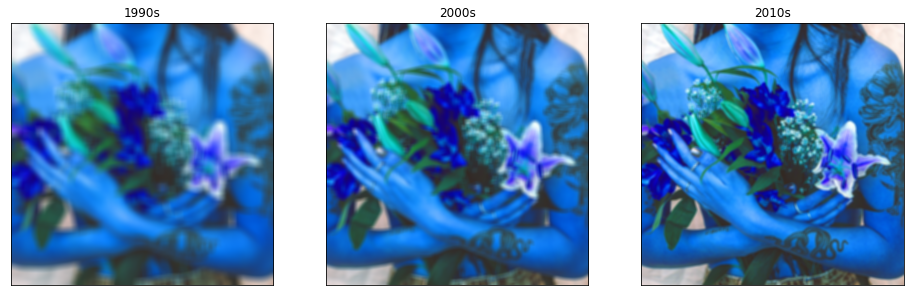

In [52]:
plt.figure(figsize = (16, 8))
img = cv2.imread('women.jpg')
#define the 3 different blur parameter regarding to the amount of peace agreements in 3 decades
b1=(df[(df['Year']>=1990)& (df['Year']<2000)].count())['Con']
b2=(df[(df['Year']>=2000)& (df['Year']<2010)].count())['Con']
b3=(df[(df['Year']>=2010)& (df['Year']<=2020)].count())['Con']

blur1=cv2.blur(img,(180-b1,180-b1))
blur2=cv2.blur(img,(180-b2,180-b2))
blur3=cv2.blur(img,(180-b3,180-b3))

plt.subplot(131),plt.imshow(blur1),plt.title('1990s')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur2),plt.title('2000s')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur3),plt.title('2010s')
plt.xticks([]), plt.yticks([])
plt.show()

<font face="Arial" size=5 color=#F3333F >Analysis 

<font face="Arial" size=4 color=#333333 >Obviously, the blurred one was in the 1990s and the 2010s is the clearest. The general trend is females' rights are considered more and more importantly through the timeline.

<font face="Arial" size=6 color=#333333 >3 Reflect and Hypothesise

<font face="Arial" size=5 color=#333333 >3.1 Reflection on the data

<font face="Arial" size=4 color=#333333 >Above all the analysis, I notice that peace agreements contribute to the rise of female's right throughout the timeline. Though some extreme cases influenced the overall pattern, the involvement of female's right in peace agreements is rising over time.
    
As for the geographical pattern, which varies in different regions. Behind the relation between year and amounts of agreements' trend, I think there are some political issues, like wars, political elections, peace campaigns, etc. These are the missing parts in our database, which would be useful to test the hypothesis below.

Also, this database contains data from 1990 to 2020, lasting for 30 years. If I want to study the histories and futures of this dataset, I will need the dataset/data about the peace agreement before 1990, and based on the pattern shown before to do some predictions for the future.
    
The correlation among the categories is low. Behind this fact might be complex reasons, different types of conflicts, regions, years, length of agreements, etc., all might be the influencing factors. As a beginner, I should learn how to use some advanced algorithms to test these hypotheses. And literature in related fields might help me learn more about the data besides the codebook.
    
To sum up, from this dataset, I gained a basic idea about real data analysis and visualization and  I will dive deeper into assignment 3.

<font face="Arial" size=5 color=#333333 >3.2 Hypotheses with explanation

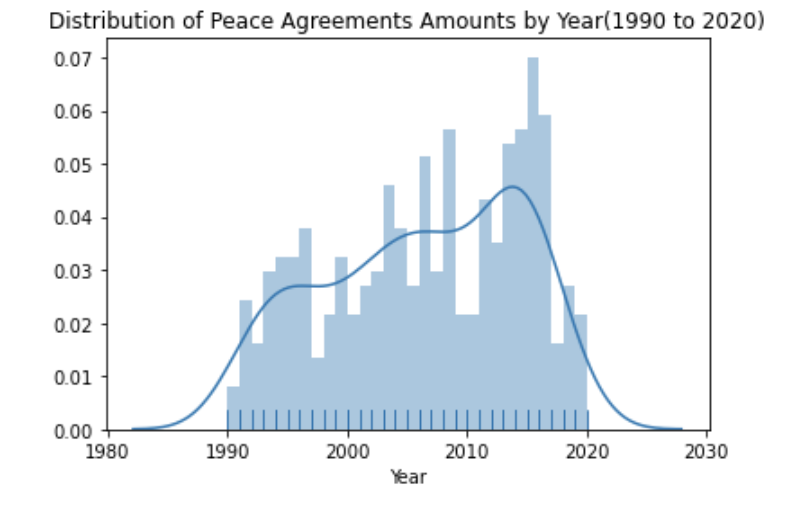

<font face="Arial" size=4 color=#F3333F >Hypothesis#1:<font face="Arial" size=4 color=#333333 > From 1980 to 1990, the number of the peace agreement signed by year experienced a rise in the world.

<font face="Arial" size=4 color=#F3333F >Explanation#1:<font face="Arial" size=4 color=#333333 > Based on this distplot, there is a continuous rise from 1990 to 2015. So I guess the situation was similar from 1980 to 1990, and to my knowledge, there is no world wars or frequent severe peace issues by then, so the trend might be the same.

<font face="Arial" size=4 color=#F3333F >How to Test #1:<font face="Arial" size=4 color=#333333 > Ask the data owner about the dataset before 1990 and merge that with our dataset, draw a linechart(x-axis:year,y-axis: number of peace agreement) or distplot(x-axis:year, y-axis:year of peace agreements' frequncy) to see the pattern. Also, I will do further study, reading papers, and social news about peace issues/ female rights in the 1980s, to see if there any major events might change the trend.

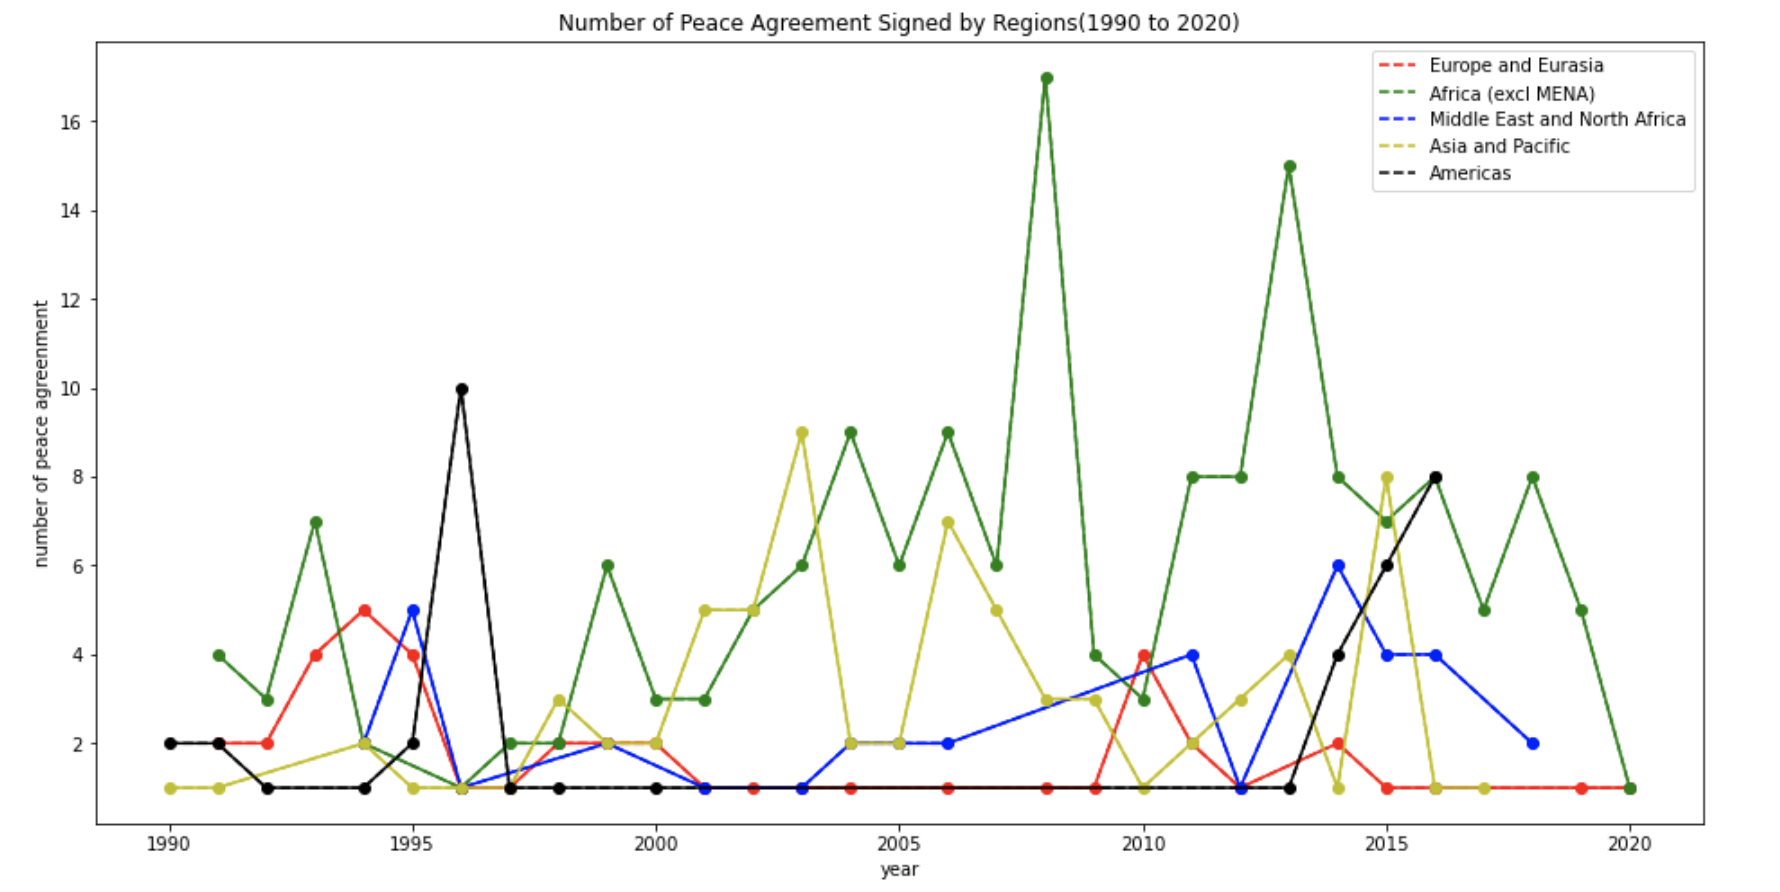

<font face="Arial" size=4 color=#F3333F >Hypothesis#2:<font face="Arial" size=4 color=#333333 > From 1997 to 2009, maybe there is no peace conflicts or war during this period in Americas.

<font face="Arial" size=4 color=#F3333F >Explanation#2:<font face="Arial" size=4 color=#333333 > Based on this line chart, between 1997 and 2009, there is no peace agreement signed or agreed in Americas according to the dataset. While in 1996 there are 10 and in 2010 there are 4.

<font face="Arial" size=4 color=#F3333F >How to test #2:<font face="Arial" size=4 color=#333333 > First I will check with data owner if there is data missing during this period. If not, I will search for literature to confirm that there are no huge conflicts from 1997 to 2009. In addition, I will look at the data(peace agreements) in 1996 and 2010 individually, check what happened both years in Americas, whether it was an end/start point of war/conflicts/campaigns, which might explain why there is no peace agreements signed or agreed between.

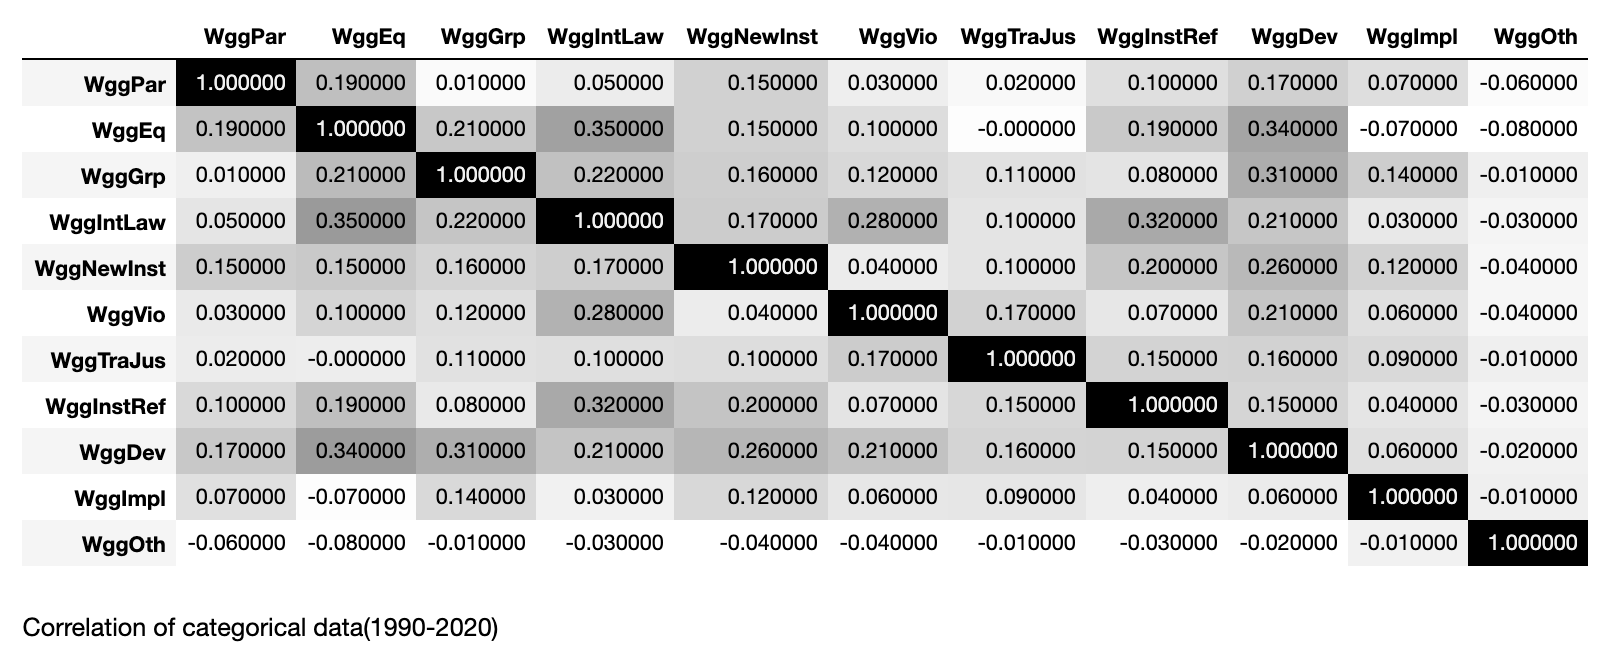

<font face="Arial" size=4 color=#F3333F >Hypothesis#3:<font face="Arial" size=4 color=#333333 > 
The correlation level of categorical data is related to the length of the peace agreement, which might be a positive correlation.

<font face="Arial" size=4 color=#F3333F >Explanation#3:<font face="Arial" size=4 color=#333333 > Since on this graph I did not see strong correlation between categorical data internally. In the context, I think maybe longer peace agreement might contain more aspects of females' right, resulting to higher correlations in categorical data.

<font face="Arial" size=4 color=#F3333F >How to test #3:<font face="Arial" size=4 color=#333333 > First I will check with max and min correlations' peace agreements, see whether they have a similar length, and whether showing the rough trend that longer ones related to higher categorical correlations. If yes, I will draw a new correlation graph to have a further test.
Then I will check the dataset (pax_all_agreements_data.xlsx), to see the categorical correlations pattern in the whole aspects(including aspects about children, old people). There might some other correlation there.

Thanks.